<a href="https://colab.research.google.com/github/ndavidd-github/ndavidd/blob/master/Stats_Using_Python_Hypothesis_Testing_(2_sample_t_test).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Hypothesis Testing Example** - Hospital Ratings

You manage two different hospitals, and you want to evaluate whether or not one performs better.  You decide to gather patient ratings for both hospitals and perform a **2-sample t-test** to determine if there are any differences between the two.


### Import Python Libraries

Python libraries help to extend the Python programming language -- or to help make our tasks easier.  There are *lots* of Python libraries and they do *lots* of different things.  For our purposes, we will import **"pandas"** to load and manipulate data, **"seaborn"** for visualization, and **"scipy"** for statistics.

In [ ]:
# Import the appropriate Python libraries.
import pandas as pd
import seaborn as sns
from scipy import stats

### Load Data (Option #1)

One of the biggest challenges that people run into with Google Colab is loading data.  For simplicity, our dataset from this example has already been stored in the cloud on Github.  (We also used a URL shortener to make it easier to type.)  To see what this file looks like, you can copy the following link (http://bit.ly/hospital_ratings) and paste into your browser window.  Another option for loading your data is from your own hard drive.  (See option #2 below.)

In [ ]:
# Load the CSV file into a dataframe.
df_hospital = pd.read_csv('http://bit.ly/hospital_ratings')

### Load Data (Option #2)

You can also load data into Google Colab from your own computer.  To do so, once you have the file downloaded from [here](https://drive.google.com/file/d/1oWP9xLYaQ08zKsdQOB3QQdS8R42VxZ-L/view?usp=sharing), (1) run the next cell to select where the file is located on your hard drive and (2) run the cell after to load the CSV file into a dataframe.  (Ensure that the name of the file is spelled correctly in the second cell below.)

In [ ]:
# Select where data file is located on our local drive.
from google.colab import files
uploaded = files.upload()

In [ ]:
# Load the CSV file into a dataframe.
import io
df_energy = pd.read_csv(io.BytesIO(uploaded['hospital_ratings.csv']))

### Explore the Data

As we explore the data, we will use the **"head"** function to preview the first few records.  Then, we'll use **"describe"** to calculate descriptive statistics and **seaborn** to generate a histogram of hospital ratings.

In [ ]:
# Preview the first few records of data.
df_hospital.head()

,Rating_A,Rating_B
0,81,89
1,77,64
2,75,35
3,74,68
4,86,69


In [ ]:
# Generate descriptive stats.
df_hospital.describe()

,Rating_A,Rating_B
count,20.00000,20.000000
mean,80.30000,59.300000
std,8.18278,12.431285
min,62.00000,35.000000
25%,75.75000,55.000000
50%,79.00000,58.500000
75%,85.25000,67.250000
max,98.00000,89.000000


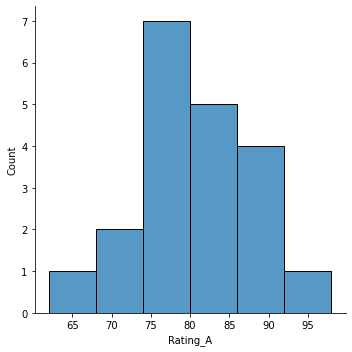

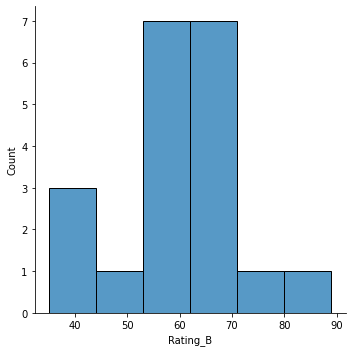

In [ ]:
# Plot the distribution of ratings for each hospital.
sns.displot(df_hospital['Rating_A']);
sns.displot(df_hospital['Rating_B']);

### Perform a Normality Test

Prior to performing a hypothesis test, we perform a normality test.  It helps us understand what hypothesis test would be appropriate.  After conducting this test, if the *p-value* is greater than 0.05, the data is normal enough for our purposes.  **Based on the result below, we assume the data is normal.**

In [ ]:
# Put each field in the dataframe into its own variable.
x = df_hospital['Rating_A']
y = df_hospital['Rating_B']

In [ ]:
# Conduct a normality test.
print(stats.normaltest(x))
print(stats.normaltest(y))

NormaltestResult(statistic=0.6819405016457806, pvalue=0.711080061938457)
NormaltestResult(statistic=1.3440347756980513, pvalue=0.5106773037091312)


### Test for Equal Variance

Prior to conducting our 2-sample t-test, we will test the samples for equal variance, which an assumption we will make.  **In this case, since the p-value is > 0.05, we assume no differences in variance.**

In [ ]:
# Perform a Bartlett's test to evaluate equal variance of the two datasets.
stats.bartlett(x,y)

BartlettResult(statistic=3.147305026286696, pvalue=0.07605247378026656)

### Perform a 2-sample t-test

When we conduct this hypothesis test, if the p-value is > 0.05, we "fail to reject the null" and assume no differences between the two samples.  When the p-value is < 0.05, we "reject the null" and state there is a difference.  **Based on the result below, we reject the null.  The hospital ratings are different.**

In [ ]:
# Conduct a 2-sample t-test.
stats.ttest_ind(x, y)

Ttest_indResult(statistic=6.310337493465553, pvalue=2.1378143666835746e-07)